# Some stats about RefSeq and multi-isoform protein coding genes

### Let's import & config notebook

In [65]:
import math
import os
import sys
import pandas as pd
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from statannot import add_stat_annotation
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import collections
from tqdm import tqdm
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
from utils.utils import load_config_file
import string

import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

## YAML FILES CONFIG
sys.path.append("/home/weber/PycharmProjects/EXOTIC/clean/src")
from utils import utils
yaml = utils.load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")

In [59]:
def output_figure(f, name):
    print(name)
    for ext in ['png', 'jpg']:
        for res in [150, 300]:
            f.savefig(name + '_{}_DPI.{}'.format(res, ext), dpi=res)

## Nb genes & exons

### Before correction

In [16]:
df_bc = pd.read_parquet(yaml["1_GENOMICS"]["Final"]["refseq_cds_with_variable"])
print('{} genes & {} exons found in RefSeq after processing'.format(df_bc.Gene.nunique(), df_bc[['Gene', 'ranges']].drop_duplicates().shape[0]))
df_bc

19306 genes & 213182 exons found in RefSeq after processing


,Gene,Exon_type,ranges,mRNA_exons,Exon_start,Exon_stop,Length,Strand,mRNA_exons_nb,mRNA_gene,mRNA_gene_nb,Ratio,Ratio_num,Const_Alt,Share,CDS_count
0,A1BG,CDS,58858388-58858395,[NM_130786],58858388,58858395,7,0,1,[NM_130786],1,1/1,1.0,Const,False,8
1,A1BG,CDS,58858719-58859006,[NM_130786],58858719,58859006,287,0,1,[NM_130786],1,1/1,1.0,Const,False,8
2,A1BG,CDS,58861736-58862017,[NM_130786],58861736,58862017,281,0,1,[NM_130786],1,1/1,1.0,Const,False,8
3,A1BG,CDS,58862757-58863053,[NM_130786],58862757,58863053,296,0,1,[NM_130786],1,1/1,1.0,Const,False,8
4,A1BG,CDS,58863649-58863921,[NM_130786],58863649,58863921,272,0,1,[NM_130786],1,1/1,1.0,Const,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213242,ZZZ3,CDS,78047461-78047576,"[NM_001308237, NM_015534]",78047461,78047576,115,0,2,"[NM_015534, NM_001308237]",2,2/2,1.0,Const,False,12
213243,ZZZ3,CDS,78047664-78047811,"[NM_001308237, NM_015534]",78047664,78047811,147,0,2,"[NM_015534, NM_001308237]",2,2/2,1.0,Const,False,12
213244,ZZZ3,CDS,78050202-78050340,"[NM_001308237, NM_015534]",78050202,78050340,138,0,2,"[NM_015534, NM_001308237]",2,2/2,1.0,Const,False,12
213245,ZZZ3,CDS,78097535-78099039,[NM_015534],78097535,78099039,1504,0,1,"[NM_015534, NM_001308237]",2,1/2,0.5,Alt,False,12


In [209]:
df_ac.loc[df_ac['Ratio_num'] > 1]

,Gene,ranges,mRNA_exons,mRNA_nb,Share,Strand,mRNA_gene,mRNA_gene_nb,Ratio,Ratio_num,Const_Alt,Ratio_num_bins,Ratio_num_bins_update,MAP,Start,End,Length,CDS_count


### After correction

In [66]:
df_ac = pd.read_parquet(yaml["2_EXPRESSION"]["Final"]["refseq_corrected_cds_recomputed"])
df_ac = df_ac.rename({'mRNA_nb_total' : 'mRNA_gene_nb'}, axis=1)
print('{} genes & {} exons found in RefSeq after processing'.format(df_ac.Gene.nunique(), df_ac[['Gene', 'ranges']].drop_duplicates().shape[0]))
df_ac

15353 genes & 178481 exons found in RefSeq after processing


,Gene,ranges,mRNA_exons,mRNA_nb,Share,Strand,mRNA_gene,mRNA_gene_nb,Ratio,Ratio_num,Const_Alt,Ratio_num_bins,Ratio_num_bins_update,MAP,Start,End,Length,CDS_count
0,A2M,9220419-9220435,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,False,0,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,4/4,1.0,Const,0.8 - 1,1.00,A2M_9220419-9220435,9220419,9220435,16,38
1,A2M,9220779-9220820,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,False,0,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,4/4,1.0,Const,0.8 - 1,1.00,A2M_9220779-9220820,9220779,9220820,41,38
2,A2M,9221336-9221438,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,False,0,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,4/4,1.0,Const,0.8 - 1,1.00,A2M_9221336-9221438,9221336,9221438,102,38
3,A2M,9222341-9222409,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,False,0,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,4/4,1.0,Const,0.8 - 1,1.00,A2M_9222341-9222409,9222341,9222409,68,38
4,A2M,9223084-9223174,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,False,0,"[NM_001347425, NM_001347423, NM_000014, NM_001...",4,4/4,1.0,Const,0.8 - 1,1.00,A2M_9223084-9223174,9223084,9223174,90,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178476,ZZZ3,78047461-78047576,"[NM_001308237, NM_015534]",2,False,0,"[NM_001308237, NM_015534]",2,2/2,1.0,Const,0.8 - 1,1.00,ZZZ3_78047461-78047576,78047461,78047576,115,12
178477,ZZZ3,78047664-78047811,"[NM_001308237, NM_015534]",2,False,0,"[NM_001308237, NM_015534]",2,2/2,1.0,Const,0.8 - 1,1.00,ZZZ3_78047664-78047811,78047664,78047811,147,12
178478,ZZZ3,78050202-78050340,"[NM_001308237, NM_015534]",2,False,0,"[NM_001308237, NM_015534]",2,2/2,1.0,Const,0.8 - 1,1.00,ZZZ3_78050202-78050340,78050202,78050340,138,12
178479,ZZZ3,78097535-78099039,[NM_015534],1,False,0,"[NM_001308237, NM_015534]",2,1/2,0.5,Alt,0.4 - 0.6,0.4 - 0.6,ZZZ3_78097535-78099039,78097535,78099039,1504,12


In [97]:
yaml = utils.load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")
biomart = pd.read_csv(yaml["1_GENOMICS"]["External"]["biomart"], compression="gzip", sep="\t")
biomart['Ensembl Canonical'] = biomart['Ensembl Canonical'].fillna(0)
biomart['Ensembl Canonical'] = biomart['Ensembl Canonical'].astype(int)
biomart

,Gene stable ID,Transcript stable ID,Ensembl Canonical,Gene name,APPRIS annotation,Transcript support level (TSL),Transcription start site (TSS),Transcript length (including UTRs and CDS),Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene % GC content,Gene type,Transcript type,RefSeq mRNA ID,HGNC ID
0,ENSG00000210049,ENST00000387314,1,MT-TF,NaN,tslNA,577,71,577,647,MT,40.85,Mt_tRNA,Mt_tRNA,NaN,HGNC:7481
1,ENSG00000211459,ENST00000389680,1,MT-RNR1,NaN,tslNA,648,954,648,1601,MT,45.49,Mt_rRNA,Mt_rRNA,NaN,HGNC:7470
2,ENSG00000210077,ENST00000387342,1,MT-TV,NaN,tslNA,1602,69,1602,1670,MT,42.03,Mt_tRNA,Mt_tRNA,NaN,HGNC:7500
3,ENSG00000210082,ENST00000387347,1,MT-RNR2,NaN,tslNA,1671,1559,1671,3229,MT,42.81,Mt_rRNA,Mt_rRNA,NaN,HGNC:7471
4,ENSG00000209082,ENST00000386347,1,MT-TL1,NaN,tslNA,3230,75,3230,3304,MT,38.67,Mt_tRNA,Mt_tRNA,NaN,HGNC:7490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280411,ENSG00000119535,ENST00000526980,0,CSF3R,NaN,tsl3,36482899,928,36466043,36483278,1,53.16,protein_coding,processed_transcript,NaN,HGNC:2439
280412,ENSG00000119535,ENST00000489551,0,CSF3R,NaN,tsl1,36482934,787,36466043,36483278,1,53.16,protein_coding,retained_intron,NaN,HGNC:2439
280413,ENSG00000119535,ENST00000533491,0,CSF3R,NaN,tsl5,36482051,512,36466043,36483278,1,53.16,protein_coding,protein_coding,NaN,HGNC:2439
280414,ENSG00000142694,ENST00000490466,1,EVA1B,principal1,tsl2 (assigned to previous version 1),36323645,980,36322030,36324154,1,70.16,protein_coding,protein_coding,NM_001304762,HGNC:25558


In [99]:
tmp_df_ac = pd.merge(df_ac.explode('mRNA_exons'), biomart[['RefSeq mRNA ID', 'Ensembl Canonical']], left_on='mRNA_exons', right_on='RefSeq mRNA ID')
tmp_df_ac[['Const_Alt', 'Ensembl Canonical']].groupby('Const_Alt')['Ensembl Canonical'].value_counts()

Const_Alt  Ensembl Canonical
Alt        0                     58267
           1                     48709
Const      1                    185055
           0                    156846
Name: Ensembl Canonical, dtype: int64

In [ ]:
tmp_df_ac_can = pd.concat([
    tmp_df_ac[['ranges', 'Const_Alt', 'Ensembl Canonical']].groupby('ranges')['Ensembl Canonical'].apply(lambda r: ",".join([str(e) for e in list(set(r))])),
    tmp_df_ac[['ranges', 'Const_Alt', 'Ensembl Canonical']].groupby('ranges')['Const_Alt'].apply(lambda r: list(set(r))[0]),                                                                                                         
    ], axis=1
)
tmp_df_ac_can

In [105]:
tmp_df_ac_can

,Ensembl Canonical,Const_Alt
ranges,,
100000139-100000199,0,Alt
100000586-100000691,"0,1",Const
100001317-100001408,0,Const
100001801-100001867,0,Const
100002352-100002425,1,Const
...,...,...
99998798-99998959,0,Const
99998869-99998904,"0,1",Const
99999243-99999384,1,Const


In [107]:
tmp_df_ac_can.groupby('Const_Alt')['Ensembl Canonical'].value_counts()

Const_Alt  Ensembl Canonical
Alt        1                    13779
           0,1                  12365
           0                    10325
Const      1                    73653
           0,1                  54791
           0                    12962
Name: Ensembl Canonical, dtype: int64

## Number of single & multi isoform (Miso) protein coding genes

### Before correction

In [36]:
print('Single isoform : {}, Multi-isoforms : {}'.format(df_bc.loc[df_bc['mRNA_gene_nb'] == 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates().shape[0], df_bc.loc[df_bc['mRNA_gene_nb'] > 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates().shape[0]))
df_bc.loc[df_bc['mRNA_gene_nb'] > 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates()

Single isoform : 8369, Multi-isoforms : 10937


,Gene,mRNA_gene_nb
8,A1CF,8
21,A2M,4
59,A2ML1,2
100,A4GALT,2
103,AAAS,2
...,...,...
213119,ZWINT,3
213131,ZXDC,2
213142,ZYG11A,2
213171,ZYX,3


### After correction

In [211]:
print('Single isoform : {}, Multi-isoforms : {}'.format(df_ac.loc[df_ac['mRNA_gene_nb'] == 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates().shape[0], df_ac.loc[df_ac['mRNA_gene_nb'] > 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates().shape[0]))
df_ac.loc[df_ac['mRNA_gene_nb'] > 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates()

Single isoform : 7173, Multi-isoforms : 8180


,Gene,mRNA_gene_nb
0,A2M,4
38,A2ML1,2
93,AACS,3
122,AADAT,2
135,AAGAB,3
...,...,...
178349,ZWILCH,2
178368,ZWINT,3
178380,ZXDC,2
178405,ZYX,3


In [23]:
nb_siso_bf_in_ac = len(set(df_bc.loc[df_bc['mRNA_gene_nb'] == 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates()['Gene'].values.tolist()).intersection(set(df_ac['Gene'].values.tolist())))
nb_miso_bf_in_ac = len(set(df_bc.loc[df_bc['mRNA_gene_nb'] > 1, ['Gene', 'mRNA_gene_nb']].drop_duplicates()['Gene'].values.tolist()).intersection(set(df_ac['Gene'].values.tolist())))
print('Single isoform : {} & Multi-isoforms : {} with original status after correction'.format(nb_siso_bf_in_ac, nb_miso_bf_in_ac))

Single isoform : 5657 & Multi-isoforms : 9696 with original status after correction


# Total number of Const & Alt coding exons 

## Number of Const & Alt coding exons in Miso genes

### Before correction

In [42]:
df_bc.loc[(df_bc['mRNA_gene_nb'] > 1 ) & (df_bc['Exon_type'] == 'CDS')].drop_duplicates(subset=['Gene', 'ranges'])['Const_Alt'].value_counts()

Const    90073
Alt      54515
Name: Const_Alt, dtype: int64

### After correction

In [212]:
df_ac.loc[(df_ac['mRNA_gene_nb'] > 1 )].drop_duplicates(subset=['Gene', 'ranges'])['Const_Alt'].value_counts()

Const    71071
Alt      36584
Name: Const_Alt, dtype: int64

## Genes with identical mRNAs on coding regions

In [2]:
utrs = pd.read_parquet(yaml["1_GENOMICS"]["Final"]["refseq_miso_utrs"])

In [8]:
utrs.loc[(utrs['5_prime_modif'] > 1) | (utrs['3_prime_modif'] > 1)]

,Gene,CDS_ranges,5_prime_modif,3_prime_modif,Nb_combi
0,A1CF,"[52566489-52566640,52569654-52569802,52570800-...",0,8,4
1,A2M,"[9220419-9220435,9220779-9220820,9221336-92214...",0,3,3
3,A4GALT,"[43088896-43089957, 43088896-43089957]",2,2,1
6,AADAT,"[170982079-170982120,170983043-170983144,17098...",0,4,2
7,AAGAB,"[67495159-67495236,67495886-67495935,67496382-...",0,2,2
...,...,...,...,...,...
10928,ZSWIM7,"[15881361-15881477,15884354-15884458,15890580-...",3,0,1
10930,ZUP1,"[116956995-116957042,116966877-116967097,11696...",0,2,3
10931,ZWILCH,"[66811239-66811416,66812928-66812998,66813388-...",4,2,2
10932,ZWINT,"[58118179-58118220,58118317-58118448,58118670-...",3,2,2


In [9]:
utrs.loc[(utrs['Nb_combi'] == 1)]

,Gene,CDS_ranges,5_prime_modif,3_prime_modif,Nb_combi
3,A4GALT,"[43088896-43089957, 43088896-43089957]",2,2,1
12,AAR2,"[34827791-34828547,34832619-34832848,34843500-...",2,2,1
15,ABAT,"[8829597-8829666,8839858-8839955,8841965-88419...",3,2,1
18,ABCA5,"[67243678-67243785,67244403-67244458,67246046-...",2,3,1
37,ABCE1,"[146025565-146025667,146026757-146026842,14602...",2,0,1
...,...,...,...,...,...
10896,ZNF879,"[178452006-178452038,178454474-178454600,17845...",5,0,1
10901,ZNRD1,"[30029302-30029446,30029694-30029794,30030001-...",5,0,1
10913,ZSCAN12,"[28358231-28359519,28360679-28360823,28365781-...",0,2,1
10921,ZSCAN29,"[43653271-43654139,43656113-43656580,43658308-...",2,3,1


39
5' modif : 39%, 3' modif : 27%, 5' & 3' modif : 35%, 
/gstock/EXOTIC/clean/FIGURES/1_ISOFORMS/venn_utrs


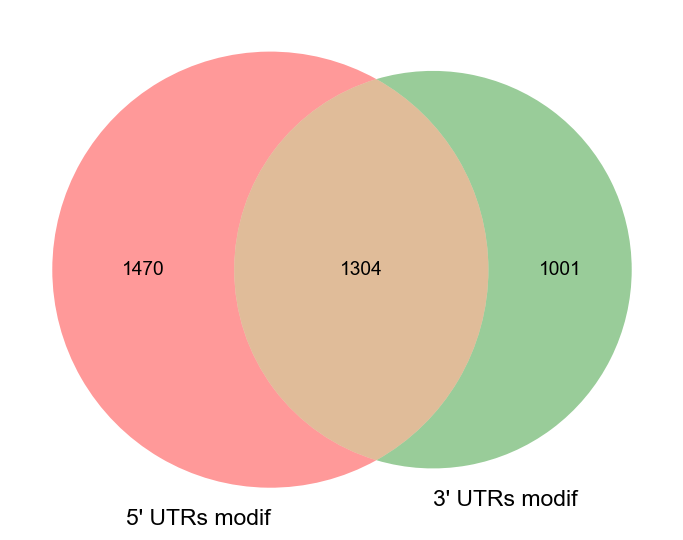

In [63]:
output_path = yaml['1_GENOMICS']['Figures_data']['venn_utrs']


from matplotlib_venn import venn2
f = plt.figure(figsize=(12,10))
five_modif = set(utrs.loc[(utrs['5_prime_modif'] > 1), 'Gene'].unique().tolist())
three_modif = set(utrs.loc[(utrs['3_prime_modif'] > 1), 'Gene'].unique().tolist())
print(int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)))
print("5' modif : {}%, 3' modif : {}%, 5' & 3' modif : {}%, ".format(
    int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(three_modif.difference(five_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(five_modif.intersection(three_modif))/len(five_modif.union(three_modif))), 0)),
                                                                    
)
     
     )
venn2([five_modif, three_modif], ["5' UTRs modif", "3' UTRs modif"])
output_figure(f, output_path.replace('.xlsx', ''))

## Number of Const & Alt coding exons in Miso genes that present different transcripts on coding regions

### Before correction

In [51]:
df_bc.loc[(~df_bc['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.values.tolist()) ) & (df_bc['mRNA_gene_nb'] > 1 ) & (df_bc['Exon_type'] == 'CDS')].drop_duplicates(subset=['Gene', 'ranges'])['Const_Alt'].value_counts()

Const    82152
Alt      54515
Name: Const_Alt, dtype: int64

### After correction

In [214]:
df_ac.loc[(~df_ac['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.values.tolist()) ) & (df_ac['mRNA_gene_nb'] > 1 ) ].drop_duplicates(subset=['Gene', 'ranges'])['Const_Alt'].value_counts()

Const    65322
Alt      36584
Name: Const_Alt, dtype: int64

## Number of Const & Alt coding exons in Miso genes that present variable regions

### Before correction

In [57]:
var_regions_bc = df_bc.loc[
    (~df_bc['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.values.tolist()) ) & 
    (df_bc['mRNA_gene_nb'] > 1 ) & 
    (df_bc['Exon_type'] == 'CDS') & 
    (df_bc['Share'] == True)
].drop_duplicates(subset=['Gene', 'ranges'])
print('Nb of var regions : {}'.format(var_regions_bc.shape[0]))
var_regions_bc['Const_Alt'].value_counts()


Nb of var regions : 17313


Alt      12204
Const     5109
Name: Const_Alt, dtype: int64

### After correction

In [215]:
var_regions_ac = df_ac.loc[
    (~df_ac['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.values.tolist()) ) & 
    (df_ac['mRNA_gene_nb'] > 1 ) & 
    (df_ac['Share'] == True)
].drop_duplicates(subset=['Gene', 'ranges'])
print('Nb of var regions : {}'.format(var_regions_ac.shape[0]))
var_regions_ac['Const_Alt'].value_counts()


Nb of var regions : 13455


Alt      8513
Const    4942
Name: Const_Alt, dtype: int64

## Distribution of intrinseq features for Const & Alt cExons

### Before correction

In [174]:
# FUNCTION TO DISPLAY VALUES ON BARS
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


Rectangle(xy=(-0.15, 0), width=0.3, height=82152, angle=0)
Rectangle(xy=(0.85, 0), width=0.3, height=54515, angle=0)
Rectangle(xy=(-0.25, 0), width=0.5, height=5969, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=11541, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=17613, angle=0)
Rectangle(xy=(2.75, 0), width=0.5, height=14915, angle=0)
Rectangle(xy=(3.75, 0), width=0.5, height=4477, angle=0)
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Const v.s. Alt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.667e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Const v.s. Alt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.798e-306 U_stat=5.811e+07
/gstock/EXOTIC/clean/FIGURES/1_ISOFOR

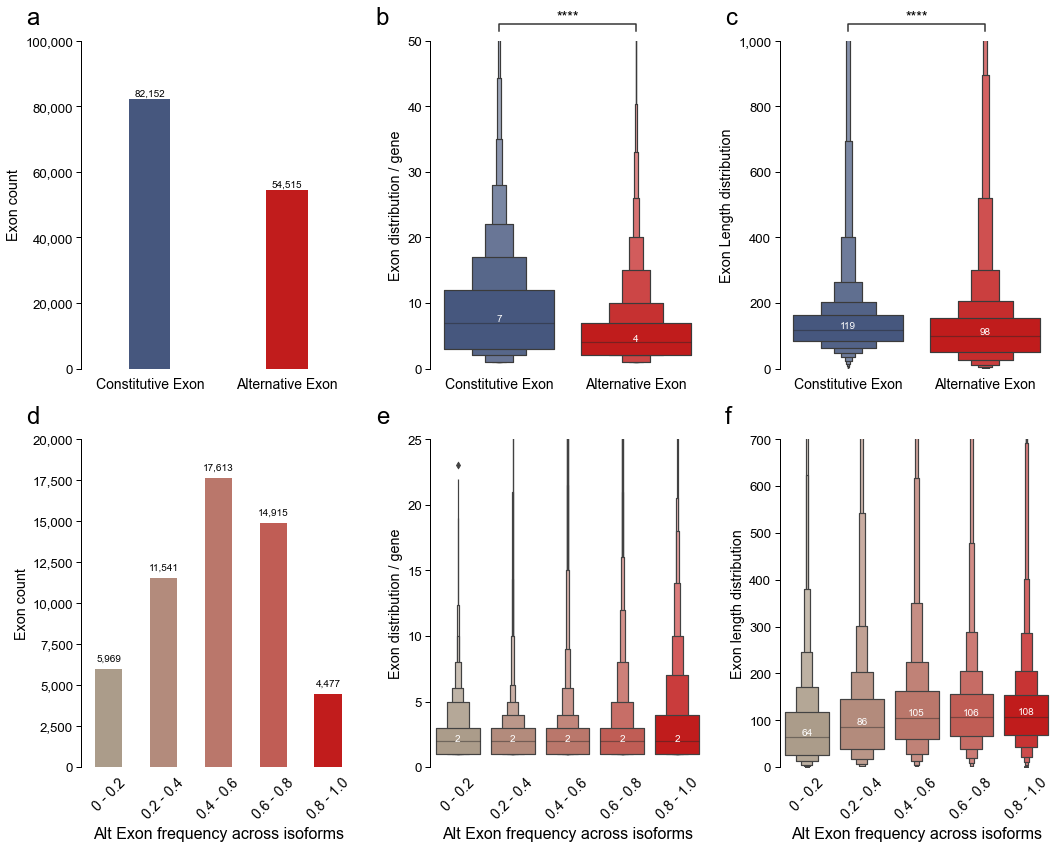

In [191]:
# TMP to reload config
yaml = utils.load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")


output_path = yaml['1_GENOMICS']['Figures_data']['exons_stats_before_correction']


# Prepare data

refseq_corrected_by_gtex = df_bc.loc[
    (~df_bc['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.values.tolist()) ) & 
    (df_bc['mRNA_gene_nb'] > 1 ) & 
    (df_bc['Exon_type'] == 'CDS')
].drop_duplicates(subset=['Gene', 'ranges'])

refseq_corrected_by_gtex['Ratio_num_bins'] = pd.cut(refseq_corrected_by_gtex['Ratio_num'], [0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0'])
refseq_corrected_by_gtex.to_csv(output_path, compression='gzip', sep='\t')



# PLOT SETTINGS

fontsize_top_row_ticks = 14
fontsize_bottom_row_labels = 16
        
sns.set_context('paper', font_scale=1.5)
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12))

# Figure A 

t = refseq_corrected_by_gtex.groupby('Const_Alt').size().reset_index()
f1 = sns.barplot(data=t.sort_values(by='Const_Alt', ascending=False), x='Const_Alt', y=0, ax=ax[0][0], palette=['#3C548899', '#DC000099'] )

widthbars = [0.3, 0.3]

for bar, newwidth in zip(f1.patches, widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)

# AES
f1.set_ylim(0, 100000)
ax[0][0].spines['bottom'].set_linewidth(0)
ax[0][0].spines['right'].set_linewidth(0)
ax[0][0].spines['top'].set_linewidth(0)
ax[0][0].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[0][0].set_xlabel('')
ax[0][0].set_ylabel('Exon count')
ax[0][0].set_xticklabels(['Constitutive Exon', 'Alternative Exon'], fontsize=fontsize_top_row_ticks)
ax[0][0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
show_values_on_bars(ax[0][0], i=0, pad=1000)


# FIGURE B

f2 = sns.boxenplot(data=refseq_corrected_by_gtex[['Const_Alt', 'Length']], x='Const_Alt', y='Length', ax=ax[0][2], palette=['#3C548899', '#DC000099'])

medians = refseq_corrected_by_gtex[['Const_Alt', 'Length']].groupby(['Const_Alt'])['Length'].median().sort_index(ascending=False)
vertical_offset = refseq_corrected_by_gtex['Length'].median() * 0.05 # offset from median for display


for xtick in f2.get_xticks():
    f2.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

# AES
ax[0][2].spines['bottom'].set_linewidth(0)
ax[0][2].spines['right'].set_linewidth(0)
ax[0][2].spines['top'].set_linewidth(0)
ax[0][2].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[0][2].set_xlabel('')
ax[0][2].set_ylabel('Exon Length distribution')
ax[0][2].set_xticklabels(['Constitutive Exon', 'Alternative Exon'], fontsize=fontsize_top_row_ticks)
ax[0][2].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
f2.set_ylim(0, 1000)


# FIGURE C

t = refseq_corrected_by_gtex[['Gene', 'Const_Alt']].groupby(['Gene', 'Const_Alt']).size().reset_index()
t = t.sort_values(by='Const_Alt', ascending=False)

f3 = sns.boxenplot(data=t, x='Const_Alt', y=0, ax=ax[0][1], palette=['#3C5488FF', '#DC000099'])

medians = refseq_corrected_by_gtex[['Const_Alt', 'Gene']].groupby(['Gene', 'Const_Alt']).size().reset_index().pivot(columns='Const_Alt', values=0, index='Gene').median().sort_index(ascending=False)
vertical_offset = refseq_corrected_by_gtex[['Const_Alt', 'Gene']].groupby(['Gene', 'Const_Alt']).size().reset_index().median() * 0.05 # offset from median for display
vertical_offset

for xtick in f3.get_xticks():
    f3.text(xtick,medians[xtick] + vertical_offset,int(medians[xtick]), 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

# AES

ax[0][1].spines['bottom'].set_linewidth(0)
ax[0][1].spines['right'].set_linewidth(0)
ax[0][1].spines['top'].set_linewidth(0)
ax[0][1].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[0][1].set_xlabel('')
ax[0][1].set_ylabel('Exon distribution / gene')
ax[0][1].set_xticklabels(['Constitutive Exon', 'Alternative Exon'], fontsize=fontsize_top_row_ticks)
f3.set_ylim(0, 50)


# FIGURE D

t = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Ratio_num_bins']].groupby('Ratio_num_bins').size().reset_index()
t = t.sort_values(by='Ratio_num_bins', ascending=False)
f4 = sns.barplot(data=t, x='Ratio_num_bins', y=0, ax=ax[1][0], palette=['#b09c85', '#bc8773', '#c76e5e', '#d24e43', '#dc0000'])
widthbars = [0.5, 0.5, 0.5, 0.5, 0.5]
for bar, newwidth in zip(f4.patches, widthbars):
    x = bar.get_x() 
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)
    
# AES

ax[1][0].spines['bottom'].set_linewidth(0)
ax[1][0].spines['right'].set_linewidth(0)
ax[1][0].spines['top'].set_linewidth(0)
ax[1][0].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[1][0].set_xlabel('Alt Exon frequency across isoforms', fontsize=fontsize_bottom_row_labels)
ax[1][0].set_ylabel('Exon count')
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), fontsize=fontsize_top_row_ticks, rotation=45)
ax[1][0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
f4.set_ylim(0, 20000)
show_values_on_bars(ax[1][0], i=0, pad=500)


# FIGURE E

t = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins']].groupby(['Gene', 'Ratio_num_bins']).size().reset_index()
t = t.loc[t[0] > 0].sort_values(by='Ratio_num_bins', ascending=True)
medians = t.groupby('Ratio_num_bins')[0].median().sort_index(ascending=True)

f5 = sns.boxenplot(data=t, x='Ratio_num_bins', y=0, ax=ax[1][1], palette=['#b09c85', '#bc8773', '#c76e5e', '#d24e43', '#dc0000'])

vertical_offset = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins']].groupby(['Gene', 'Ratio_num_bins']).size().reset_index().median() * 0.05 # offset from median for display

for j, xtick in enumerate(f5.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    f5.text(xtick,medians[xtick] + vertical_offset,int(medians[xtick]), 
            horizontalalignment='center',size='x-small',color=color,weight='semibold')

# AES

ax[1][1].spines['bottom'].set_linewidth(0)
ax[1][1].spines['right'].set_linewidth(0)
ax[1][1].spines['top'].set_linewidth(0)
ax[1][1].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[1][1].set_xlabel('Alt Exon frequency across isoforms', fontsize=fontsize_bottom_row_labels)
ax[1][1].set_ylabel('Exon distribution / gene')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), fontsize=fontsize_top_row_ticks, rotation=45)
f5.set_ylim(0, 25)

# FIGURE F

t = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins', 'Length']]
t = t.sort_values(by='Ratio_num_bins', ascending=True)
f6 = sns.boxenplot(data=t, x='Ratio_num_bins', y='Length', ax=ax[1][2], palette=['#b09c85', '#bc8773', '#c76e5e', '#d24e43', '#dc0000'])

medians = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins', 'Length']].groupby(['Ratio_num_bins'])['Length'].median().sort_index(ascending=True)
vertical_offset = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Length']].median() * 0.05 # offset from median for display

for j, xtick in enumerate(f6.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    f6.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color=color,weight='semibold')

# AES

ax[1][2].spines['bottom'].set_linewidth(0)
ax[1][2].spines['right'].set_linewidth(0)
ax[1][2].spines['top'].set_linewidth(0)
ax[1][2].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[1][2].set_xlabel('Alt Exon frequency across isoforms', fontsize=fontsize_bottom_row_labels)
ax[1][2].set_ylabel('Exon length distribution')
ax[1][2].set_xticklabels(ax[1][2].get_xticklabels(), fontsize=fontsize_top_row_ticks, rotation=45)
f6.set_ylim(0, 700)

# FINAL SETTINGS

axs = ax.flat

for n, a in enumerate(axs):
    a.text(-0.2, 1.05, string.ascii_lowercase[n], transform=a.transAxes, size=24, weight='bold')

plt.tight_layout()
add_stat_annotation(f2, data=refseq_corrected_by_gtex, x='Const_Alt', y='Length', order= ['Const', 'Alt'],
                    box_pairs=[('Const', 'Alt')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

t = refseq_corrected_by_gtex[['Gene', 'Const_Alt']].groupby(['Gene', 'Const_Alt']).size().reset_index()

add_stat_annotation(f3, data=t, x='Const_Alt', y=0, order= ['Const', 'Alt'],
                    box_pairs=[('Const', 'Alt')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


# SAVE
output_figure(f, output_path.replace('.csv.gz', ''))

### After correction

Rectangle(xy=(-0.15, 0), width=0.3, height=65322, angle=0)
Rectangle(xy=(0.85, 0), width=0.3, height=36584, angle=0)
Rectangle(xy=(-0.25, 0), width=0.5, height=3261, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=7608, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=13712, angle=0)
Rectangle(xy=(2.75, 0), width=0.5, height=9755, angle=0)
Rectangle(xy=(3.75, 0), width=0.5, height=2248, angle=0)
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Const v.s. Alt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.422e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Const v.s. Alt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.485e+07
/gstock/EXOTIC/clean/FIGURES/1_ISOFORMS/

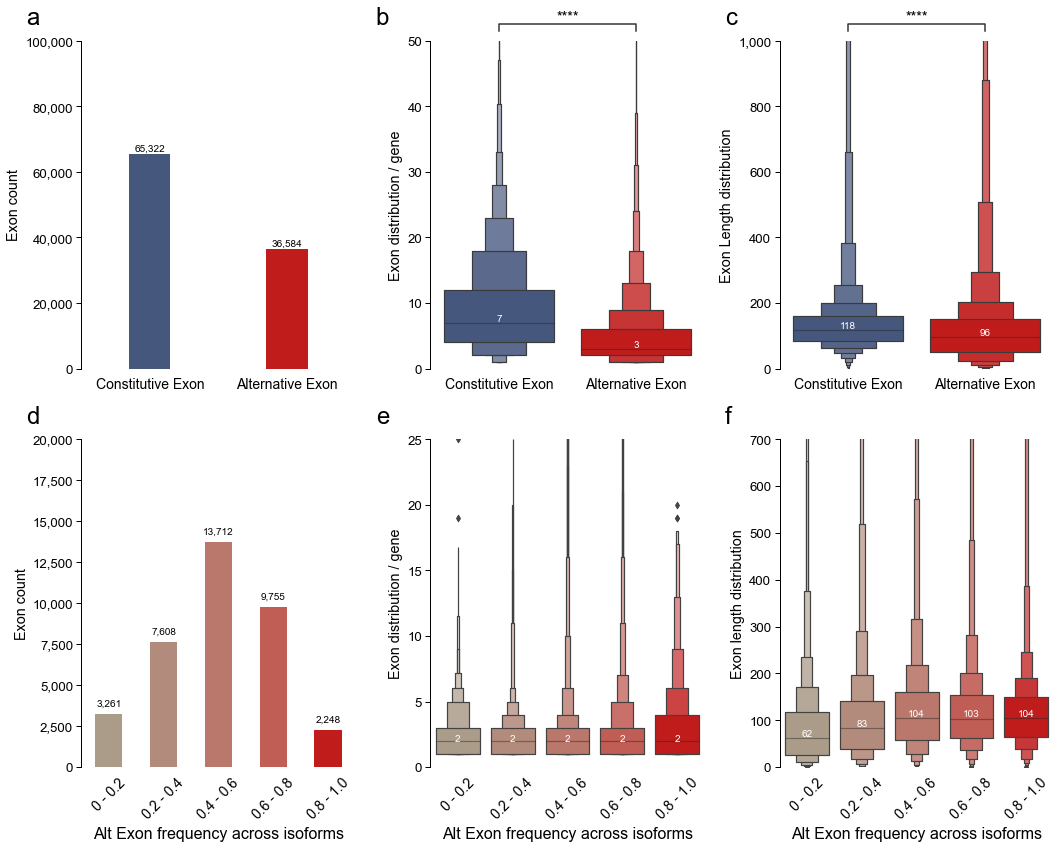

In [216]:
# TMP to reload config
yaml = utils.load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")


output_path = yaml['1_GENOMICS']['Figures_data']['exons_stats_after_correction']



# Prepare data

refseq_corrected_by_gtex = df_ac.loc[
    (~df_ac['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.values.tolist()) ) & 
    (df_ac['mRNA_gene_nb'] > 1 )
].drop_duplicates(subset=['Gene', 'ranges'])

refseq_corrected_by_gtex['Ratio_num_bins'] = pd.cut(refseq_corrected_by_gtex['Ratio_num'], [0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0'])
refseq_corrected_by_gtex.to_csv(output_path, compression='gzip', sep='\t')



# PLOT SETTINGS

fontsize_top_row_ticks = 14
fontsize_bottom_row_labels = 16
        
sns.set_context('paper', font_scale=1.5)
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12))

# Figure A 

t = refseq_corrected_by_gtex.groupby('Const_Alt').size().reset_index()
f1 = sns.barplot(data=t.sort_values(by='Const_Alt', ascending=False), x='Const_Alt', y=0, ax=ax[0][0], palette=['#3C548899', '#DC000099'] )

widthbars = [0.3, 0.3]

for bar, newwidth in zip(f1.patches, widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)

# AES
f1.set_ylim(0, 100000)
ax[0][0].spines['bottom'].set_linewidth(0)
ax[0][0].spines['right'].set_linewidth(0)
ax[0][0].spines['top'].set_linewidth(0)
ax[0][0].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[0][0].set_xlabel('')
ax[0][0].set_ylabel('Exon count')
ax[0][0].set_xticklabels(['Constitutive Exon', 'Alternative Exon'], fontsize=fontsize_top_row_ticks)
ax[0][0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
show_values_on_bars(ax[0][0], i=0, pad=1000)


# FIGURE B

f2 = sns.boxenplot(data=refseq_corrected_by_gtex[['Const_Alt', 'Length']], x='Const_Alt', y='Length', ax=ax[0][2], palette=['#3C548899', '#DC000099'])

medians = refseq_corrected_by_gtex[['Const_Alt', 'Length']].groupby(['Const_Alt'])['Length'].median().sort_index(ascending=False)
vertical_offset = refseq_corrected_by_gtex['Length'].median() * 0.05 # offset from median for display


for xtick in f2.get_xticks():
    f2.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

# AES
ax[0][2].spines['bottom'].set_linewidth(0)
ax[0][2].spines['right'].set_linewidth(0)
ax[0][2].spines['top'].set_linewidth(0)
ax[0][2].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[0][2].set_xlabel('')
ax[0][2].set_ylabel('Exon Length distribution')
ax[0][2].set_xticklabels(['Constitutive Exon', 'Alternative Exon'], fontsize=fontsize_top_row_ticks)
ax[0][2].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
f2.set_ylim(0, 1000)


# FIGURE C

t = refseq_corrected_by_gtex[['Gene', 'Const_Alt']].groupby(['Gene', 'Const_Alt']).size().reset_index()
t = t.sort_values(by='Const_Alt', ascending=False)

f3 = sns.boxenplot(data=t, x='Const_Alt', y=0, ax=ax[0][1], palette=['#3C5488FF', '#DC000099'])

medians = refseq_corrected_by_gtex[['Const_Alt', 'Gene']].groupby(['Gene', 'Const_Alt']).size().reset_index().pivot(columns='Const_Alt', values=0, index='Gene').median().sort_index(ascending=False)
vertical_offset = refseq_corrected_by_gtex[['Const_Alt', 'Gene']].groupby(['Gene', 'Const_Alt']).size().reset_index().median() * 0.05 # offset from median for display
vertical_offset

for xtick in f3.get_xticks():
    f3.text(xtick,medians[xtick] + vertical_offset,int(medians[xtick]), 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

# AES

ax[0][1].spines['bottom'].set_linewidth(0)
ax[0][1].spines['right'].set_linewidth(0)
ax[0][1].spines['top'].set_linewidth(0)
ax[0][1].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[0][1].set_xlabel('')
ax[0][1].set_ylabel('Exon distribution / gene')
ax[0][1].set_xticklabels(['Constitutive Exon', 'Alternative Exon'], fontsize=fontsize_top_row_ticks)
f3.set_ylim(0, 50)


# FIGURE D

t = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Ratio_num_bins']].groupby('Ratio_num_bins').size().reset_index()
t = t.sort_values(by='Ratio_num_bins', ascending=False)
f4 = sns.barplot(data=t, x='Ratio_num_bins', y=0, ax=ax[1][0], palette=['#b09c85', '#bc8773', '#c76e5e', '#d24e43', '#dc0000'])
widthbars = [0.5, 0.5, 0.5, 0.5, 0.5]
for bar, newwidth in zip(f4.patches, widthbars):
    x = bar.get_x() 
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)
    
# AES

ax[1][0].spines['bottom'].set_linewidth(0)
ax[1][0].spines['right'].set_linewidth(0)
ax[1][0].spines['top'].set_linewidth(0)
ax[1][0].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[1][0].set_xlabel('Alt Exon frequency across isoforms', fontsize=fontsize_bottom_row_labels)
ax[1][0].set_ylabel('Exon count')
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), fontsize=fontsize_top_row_ticks, rotation=45)
ax[1][0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
f4.set_ylim(0, 20000)
show_values_on_bars(ax[1][0], i=0, pad=500)


# FIGURE E

t = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins']].groupby(['Gene', 'Ratio_num_bins']).size().reset_index()
t = t.loc[t[0] > 0].sort_values(by='Ratio_num_bins', ascending=True)
medians = t.groupby('Ratio_num_bins')[0].median().sort_index(ascending=True)

f5 = sns.boxenplot(data=t, x='Ratio_num_bins', y=0, ax=ax[1][1], palette=['#b09c85', '#bc8773', '#c76e5e', '#d24e43', '#dc0000'])

vertical_offset = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins']].groupby(['Gene', 'Ratio_num_bins']).size().reset_index().median() * 0.05 # offset from median for display

for j, xtick in enumerate(f5.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    f5.text(xtick,medians[xtick] + vertical_offset,int(medians[xtick]), 
            horizontalalignment='center',size='x-small',color=color,weight='semibold')

# AES

ax[1][1].spines['bottom'].set_linewidth(0)
ax[1][1].spines['right'].set_linewidth(0)
ax[1][1].spines['top'].set_linewidth(0)
ax[1][1].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[1][1].set_xlabel('Alt Exon frequency across isoforms', fontsize=fontsize_bottom_row_labels)
ax[1][1].set_ylabel('Exon distribution / gene')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), fontsize=fontsize_top_row_ticks, rotation=45)
f5.set_ylim(0, 25)

# FIGURE F

t = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins', 'Length']]
t = t.sort_values(by='Ratio_num_bins', ascending=True)
f6 = sns.boxenplot(data=t, x='Ratio_num_bins', y='Length', ax=ax[1][2], palette=['#b09c85', '#bc8773', '#c76e5e', '#d24e43', '#dc0000'])

medians = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Gene', 'Ratio_num_bins', 'Length']].groupby(['Ratio_num_bins'])['Length'].median().sort_index(ascending=True)
vertical_offset = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Const_Alt'] == 'Alt', ['Length']].median() * 0.05 # offset from median for display

for j, xtick in enumerate(f6.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    f6.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color=color,weight='semibold')

# AES

ax[1][2].spines['bottom'].set_linewidth(0)
ax[1][2].spines['right'].set_linewidth(0)
ax[1][2].spines['top'].set_linewidth(0)
ax[1][2].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[1][2].set_xlabel('Alt Exon frequency across isoforms', fontsize=fontsize_bottom_row_labels)
ax[1][2].set_ylabel('Exon length distribution')
ax[1][2].set_xticklabels(ax[1][2].get_xticklabels(), fontsize=fontsize_top_row_ticks, rotation=45)
f6.set_ylim(0, 700)

# FINAL SETTINGS

axs = ax.flat

for n, a in enumerate(axs):
    a.text(-0.2, 1.05, string.ascii_lowercase[n], transform=a.transAxes, size=24, weight='bold')

plt.tight_layout()
add_stat_annotation(f2, data=refseq_corrected_by_gtex, x='Const_Alt', y='Length', order= ['Const', 'Alt'],
                    box_pairs=[('Const', 'Alt')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

t = refseq_corrected_by_gtex[['Gene', 'Const_Alt']].groupby(['Gene', 'Const_Alt']).size().reset_index()

add_stat_annotation(f3, data=t, x='Const_Alt', y=0, order= ['Const', 'Alt'],
                    box_pairs=[('Const', 'Alt')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


# SAVE

output_figure(f, output_path.replace('.csv.gz', ''))

## mRNA distribution /gene + cumsum

### A) Before correction B) After correction

    mRNA_gene_nb     0
0              2  3487
1              3  2209
2              4  1303
3              5   822
4              6   495
5              7   318
6              8   215
7              9   184
8             10   120
9             11    76
10            12    62
11            13    54
12            14    34
13            15    30
14            16    29
15            17    28
16            18    17
17            19    16
18            20    16
19            21    16
20            22    12
21            23    10
22            24     2
23            25     6
24            26     7
25            27    12
26            28     7
27            29     3
28            30     4
29            31     9
30            32     2
31            33     6
32            34     3
33            35     1
34            36     5
35            37     1
36            38     1
37            39     3
38            41     2
39            46     1
40            49     1
41            51     2
42         

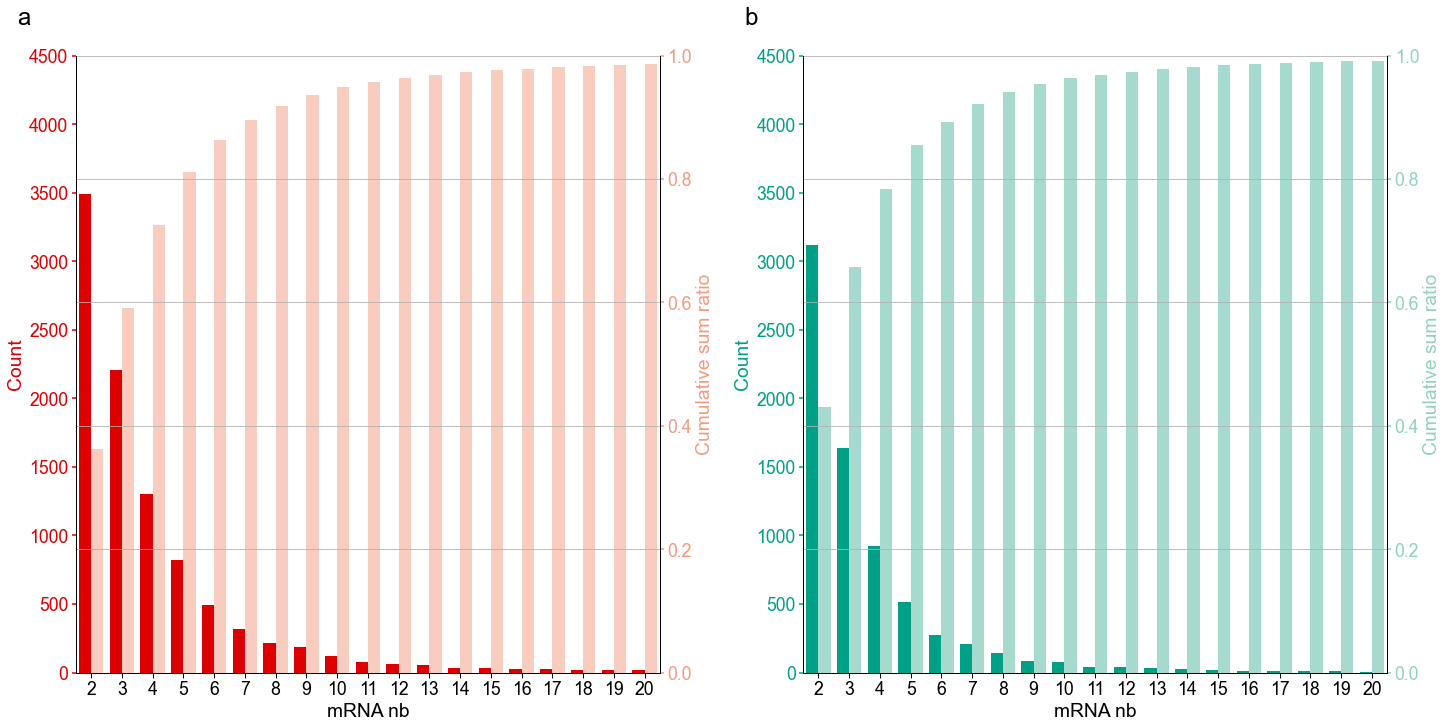

In [217]:
# TMP to reload config
yaml = utils.load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")

output_path = yaml['1_GENOMICS']['Figures_data']['mrna_distribution_before_correction']



# CONFIG COLORS
color_aa = '#DC0000FF'
color_ab = '#F39B7FFF'
color_ba = '#00A087FF'
color_bb = '#91D1C2FF'

# SNS CONTEXT & FIG
sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(ncols=2, figsize=(20,10), constrained_layout=True)

# FIRST PART - before GTEx correction

# REMOVE NOT MIso genes
df = df_bc.loc[
    (~df_bc['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.unique().tolist()))
]

# Process data
refseq_lite = df.loc[(df['mRNA_gene_nb'] > 1) & (df['CDS_count'] > 1), ['Gene', 'mRNA_gene_nb']].drop_duplicates()
refseq_lite.columns = ['Gene', 'mRNA_gene_nb']

# Prepare left barplot
data = refseq_lite.groupby('mRNA_gene_nb').size().reset_index()
print(data)
data.to_excel(output_path)

# Prepare right barplot cumsum
cs = refseq_lite.groupby('mRNA_gene_nb').size().cumsum() / refseq_lite.groupby('mRNA_gene_nb').size().sum()
cs = cs.reset_index()

# Left barplot with y axis
ax1_ = ax[0].bar(data.mRNA_gene_nb.values, data[0].values,
       align='edge',
       alpha=1,
       color=color_aa,
       width=-0.4
      )

# Right baprlot with y secondary axis
ax2 = ax[0].twinx()
ax2_ = ax2.bar(cs.mRNA_gene_nb.values, cs[0].values, alpha=0.5, color=color_ab, align='edge', width=0.4)

# AES
ax2.set_xlim(1.5,20.5)
ax[0].set_xticks(np.arange(2,21))
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x, 0)))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
ax[0].yaxis.label.set_color(color_aa)
ax2.yaxis.label.set_color(color_ab)
tkw = dict(size=4, width=1.5)
ax[0].tick_params(axis='y', colors=color_aa, **tkw)
ax2.tick_params(axis='y', colors=color_ab, **tkw)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('mRNA nb')
ax2.set_ylabel('Cumulative sum ratio')
ax[0].spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax[0].set_ylim(0,4500)
ax2.set_ylim(0,1)
ax[0].text(-0.1, 1.05, 'a', transform=ax[0].transAxes, size=24, weight='bold')
ax2.grid(axis='y')


# SECOND PART - after GTEx correction

output_path = yaml['1_GENOMICS']['Figures_data']['mrna_distribution_after_correction']

df_ac = df_ac.loc[~df_ac['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.unique().tolist())]
refseq_lite = df_ac.loc[(df_ac['mRNA_gene_nb'] > 1) & (df_ac['CDS_count'] > 1), ['Gene', 'mRNA_gene_nb']].drop_duplicates()
refseq_lite.columns = ['Gene', 'mRNA_nb']


data = refseq_lite.groupby('mRNA_nb').size().reset_index()
print(data)
data.to_excel(output_path)

cs = refseq_lite.groupby('mRNA_nb').size().cumsum() / refseq_lite.groupby('mRNA_nb').size().sum()
cs = cs.reset_index()
# ax.bar(x=[1,2,3], y=[2,3,4], )
ax1_ = ax[1].bar(data.mRNA_nb.values, data[0].values,
#        yerr=error,
       align='edge',
       alpha=1,
       color=color_ba,
       width=-0.4
      )
ax2 = ax[1].twinx()
ax2_ = ax2.bar(cs.mRNA_nb.values, cs[0].values, alpha=0.8, color=color_bb, align='edge', width=0.4)
ax2.set_xlim(1.5,20.5)
ax[1].set_xticks(np.arange(2,21))

# ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x, 0)))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
ax[1].yaxis.label.set_color(color_ba)
ax2.yaxis.label.set_color(color_bb)

tkw = dict(size=4, width=1.5)
ax[1].tick_params(axis='y', colors=color_ba, **tkw)
ax2.tick_params(axis='y', colors=color_bb, **tkw)
ax[1].set_ylabel('Count')
ax[1].set_xlabel('mRNA nb')
ax2.set_ylabel('Cumulative sum ratio')
ax[1].spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax[1].set_ylim(0,4500)
ax2.set_ylim(0,1)
ax[1].text(-0.1, 1.05, 'b', transform=ax[1].transAxes, size=24, weight='bold')
ax2.grid(axis='y')

# SAVE

output_figure(f, output_path.replace('_after_correction.xlsx', ''))

    mRNA_nb     0
0         2  3117
1         3  1636
2         4   920
3         5   515
4         6   270
5         7   210
6         8   140
7         9    87
8        10    73
9        11    38
10       12    38
11       13    30
12       14    25
13       15    20
14       16    14
15       17    14
16       18     9
17       19    12
18       20     5
19       21     6
20       22    12
21       23     3
22       24     1
23       25     6
24       26     4
25       27     3
26       28     2
27       29     2
28       30     3
29       31     2
30       32     3
31       33     1
32       34     1
33       35     2
34       36     1
35       39     1
36       51     1
37       54     1
38       62     1
39       70     1
40       72     1


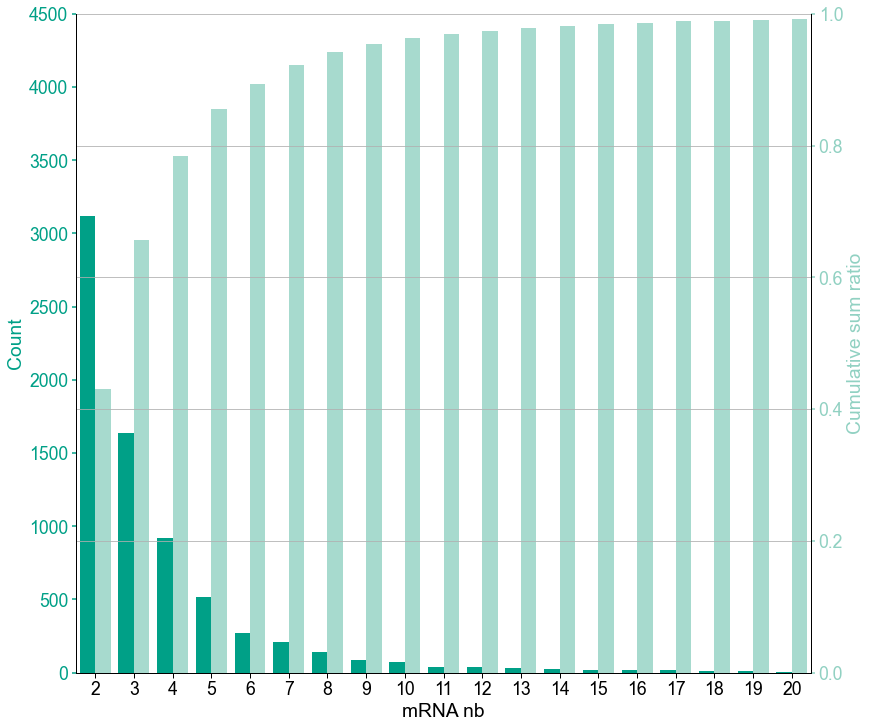

In [57]:
# TMP to reload config
yaml = utils.load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")

output_path = yaml['1_GENOMICS']['Figures_data']['mrna_distribution_before_correction']



# CONFIG COLORS
color_aa = '#DC0000FF'
color_ab = '#F39B7FFF'
color_ba = '#00A087FF'
color_bb = '#91D1C2FF'

# SNS CONTEXT & FIG
sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(ncols=1, figsize=(12,10), constrained_layout=True)



# SECOND PART - after GTEx correction

output_path = yaml['1_GENOMICS']['Figures_data']['mrna_distribution_after_correction']

df_ac = df_ac.loc[~df_ac['Gene'].isin(utrs.loc[utrs['Nb_combi'] == 1].Gene.unique().tolist())]
refseq_lite = df_ac.loc[(df_ac['mRNA_gene_nb'] > 1) & (df_ac['CDS_count'] > 1), ['Gene', 'mRNA_gene_nb']].drop_duplicates()
refseq_lite.columns = ['Gene', 'mRNA_nb']


data = refseq_lite.groupby('mRNA_nb').size().reset_index()
print(data)
data.to_excel(output_path)

cs = refseq_lite.groupby('mRNA_nb').size().cumsum() / refseq_lite.groupby('mRNA_nb').size().sum()
cs = cs.reset_index()
# ax.bar(x=[1,2,3], y=[2,3,4], )
ax1_ = ax.bar(data.mRNA_nb.values, data[0].values,
#        yerr=error,
       align='edge',
       alpha=1,
       color=color_ba,
       width=-0.4
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(cs.mRNA_nb.values, cs[0].values, alpha=0.8, color=color_bb, align='edge', width=0.4)
ax2.set_xlim(1.5,20.5)
ax.set_xticks(np.arange(2,21))

# ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x, 0)))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
ax.yaxis.label.set_color(color_ba)
ax2.yaxis.label.set_color(color_bb)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=color_ba, **tkw)
ax2.tick_params(axis='y', colors=color_bb, **tkw)
ax.set_ylabel('Count')
ax.set_xlabel('mRNA nb')
ax2.set_ylabel('Cumulative sum ratio')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax.set_ylim(0,4500)
ax2.set_ylim(0,1)
# ax[1].text(-0.1, 1.05, 'b', transform=ax[1].transAxes, size=24, weight='bold')
ax2.grid(axis='y')

# SAVE

# output_figure(f, output_path.replace('_after_correction.xlsx', ''))